Dataset shape: (450, 5)
Features shape: (450, 4)
Target shape: (450,)
Training set shape: (360, 4)
Test set shape: (90, 4)
Coefficients: [-8847.50810731 -1525.91325442 11011.25405511  2004.09797594]
Intercept: 3812.1592784584304
Cross-Validation Error for this fold: 179.6052026495889
Coefficients: [-8124.20703061 -1742.52256008 10482.11413492  1967.64823598]
Intercept: 3815.800740891892
Cross-Validation Error for this fold: 196.35926701401397
Coefficients: [-9707.62702859  -948.86630011 11302.13878933  2042.304529  ]
Intercept: 3821.684526165869
Cross-Validation Error for this fold: 164.86263867048427
Coefficients: [-9044.13441544 -1394.96486529 11078.57712408  2020.8240143 ]
Intercept: 3832.1152600531045
Cross-Validation Error for this fold: 192.88913906583653
Coefficients: [-9601.20408662 -1578.79783102 11820.80140916  2079.26579914]
Intercept: 3812.4349949886146
Cross-Validation Error for this fold: 157.2595774715394
Average Cross-Validation Error: 178.1951649742926
Final Model Coef

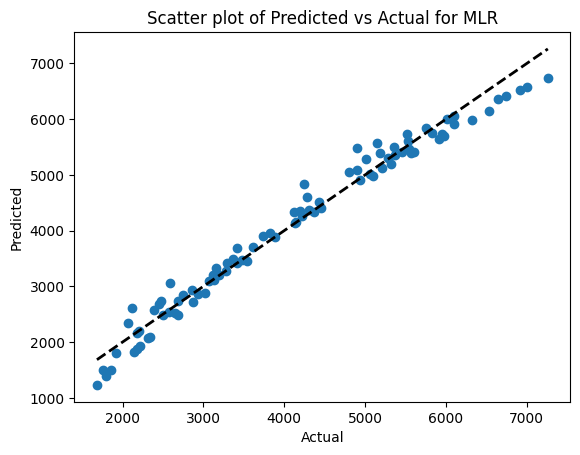

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

dataset = pd.read_csv('../Data/A1-turbine.txt', sep='\t', comment='#')  

imputer = SimpleImputer(strategy='mean') 
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

X = dataset_imputed.iloc[:, :-1]
y = dataset_imputed.iloc[:, -1]

print(f"Dataset shape: {dataset_imputed.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

kf = KFold(n_splits=5)
cv_errors = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')

    y_pred_cv = model.predict(X_val_cv)
    error = np.mean(np.abs(y_pred_cv - y_val_cv)) 
    cv_errors.append(error)

    print(f'Cross-Validation Error for this fold: {error}')

average_cv_error = np.mean(cv_errors)
print(f'Average Cross-Validation Error: {average_cv_error}')

model_final = LinearRegression()
model_final.fit(X_train_scaled, y_train)

print(f'Final Model Coefficients: {model_final.coef_}')
print(f'Final Model Intercept: {model_final.intercept_}')

predictions_test = model_final.predict(X_test_scaled)
test_error = np.mean(np.abs(predictions_test - y_test))
print(f'Test Error: {test_error}')

plt.scatter(y_test, predictions_test)
plt.title('Scatter plot of Predicted vs Actual for MLR')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.show()
